# Proyek Analisis Data: [Bike Sharing Datset]
- **Nama:** [Muhammad Hafizhuda]
- **Email:** [mhafizhuda03@gmail.com/mc012d5y2163@student.devacademy.id]
- **ID Dicoding:** [MC012D5Y2163]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penggunaan rental sepeda berdasarkan musim?
- Pertanyaan 2: Faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [56]:
df = pd.read_csv("day.csv")

**Insight:**
-- Dataset telah dimuat dan siap untuk dianalisis.

### Assessing Data

In [57]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
 - Data memiliki 16 kolom, termasuk informasi tentang cuaca, musim, dan jumlah penyewaan sepeda.
 - Tidak ada nilai yang hilang dalam dataset.


In [58]:
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
df_clean['season'] = df_clean['season'].map(season_mapping)

### Cleaning Data

In [59]:
df_clean = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [60]:
print(df_clean['season'].unique())

[1 2 3 4]


**Insight:**
- Kolom 'instant', 'dteday', 'casual', dan 'registered' dihapus karena tidak diperlukan.


## Exploratory Data Analysis (EDA)

In [61]:
print(df_clean.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600  



### Explore Data Distribution

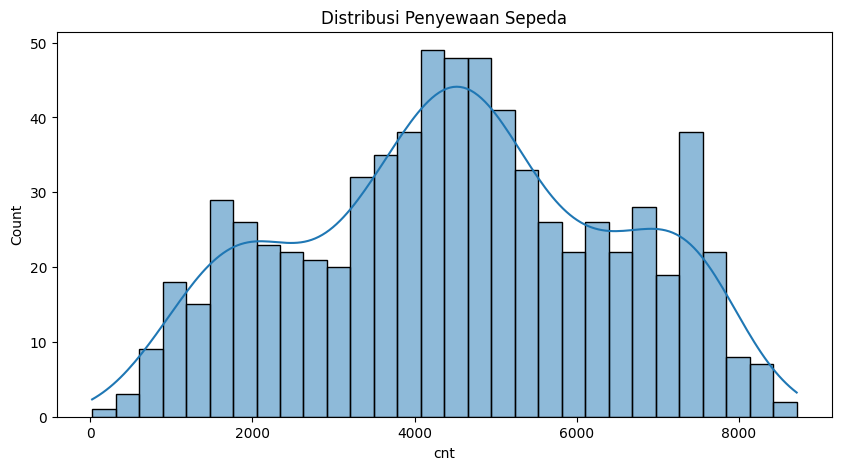

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['cnt'], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda")
plt.show()

**Insight:**
Jumlah penyewaan sepeda cenderung lebih tinggi di musim Fall dan lebih rendah di musim Spring.

## Eksplorasi Variabel COrelation

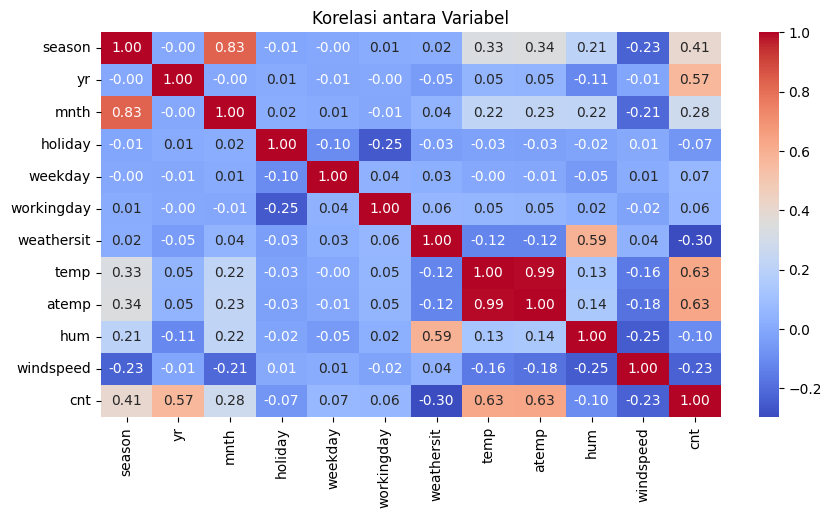

In [63]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antara Variabel")
plt.show()

**Insight**:

- Temperatur (temp) dan Temperatur Terasa (atemp) menunjukkan hubungan positif kuat dengan jumlah penyewaan sepeda (r ≈ 0.63). Semakin tinggi suhu, semakin banyak sepeda yang disewa.

- Tahun (yr) memiliki korelasi positif (r ≈ 0.57), menunjukkan bahwa jumlah penyewaan meningkat seiring waktu.
Variabel yang Berkaitan Negatif dengan Penyewaan Sepeda:

- Kondisi cuaca (weathersit) memiliki korelasi negatif (r ≈ -0.30), menunjukkan bahwa kondisi cuaca yang kurang mendukung berdampak pada penurunan jumlah penyewaan.

- Kecepatan angin (windspeed) memiliki korelasi negatif (r ≈ -0.23), menandakan bahwa angin kencang membuat jumlah penyewaan lebih sedikit.

- Kelembaban (hum) memiliki korelasi negatif kecil (r ≈ -0.10), artinya tingkat kelembaban yang lebih tinggi sedikit berpengaruh pada penurunan jumlah penyewaan.
Variabel yang Tidak Berpengaruh Besar:

- Hari libur (holiday), hari dalam seminggu (weekday), dan hari kerja (workingday) memiliki korelasi yang rendah dengan jumlah penyewaan sepeda (r sekitar 0.06 - 0.07). Ini menunjukkan bahwa pola penyewaan sepeda tidak jauh berbeda antara hari kerja dan hari libur.

In [64]:
#Agregasi Data
df_season = df_clean.groupby('season')['cnt'].mean().reset_index()
df_season = df_season.sort_values(by='cnt', ascending=False)
print(df_season)


   season          cnt
2       3  5644.303191
1       2  4992.331522
3       4  4728.162921
0       1  2604.132597


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penggunaan rental sepeda berdasarkan musim

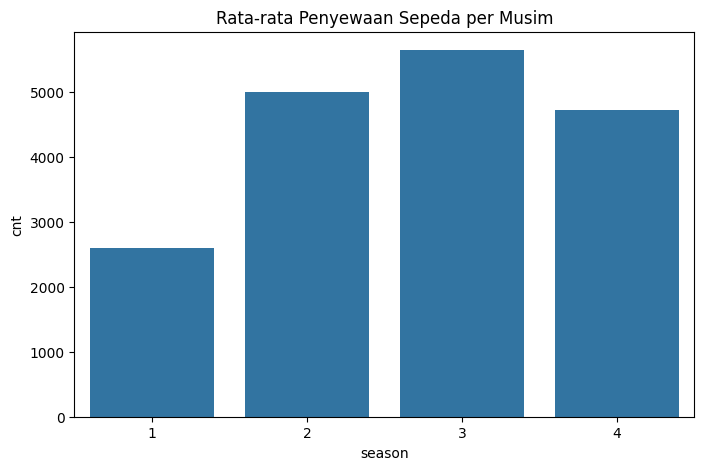

   season          cnt
2       3  5644.303191
1       2  4992.331522
3       4  4728.162921
0       1  2604.132597


In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=df_season)
plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.show()
print(df_season)

**Insight**

- Musim dengan Penyewaan Terendah:

    Musim 1 (winter/musim dingin) memiliki jumlah penyewaan sepeda paling rendah.
Hal ini kemungkinan disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung untuk bersepeda, seperti salju atau hujan.

- Musim dengan Penyewaan Tertinggi:

    Musim 3 (fall/musim gugur) mencatat jumlah penyewaan tertinggi.
Ini mungkin karena suhu yang lebih nyaman dibandingkan musim panas, serta cuaca yang lebih stabil.

### Pertanyaan 2: Faktor yang Mempengaruhi Penyewaan Sepeda

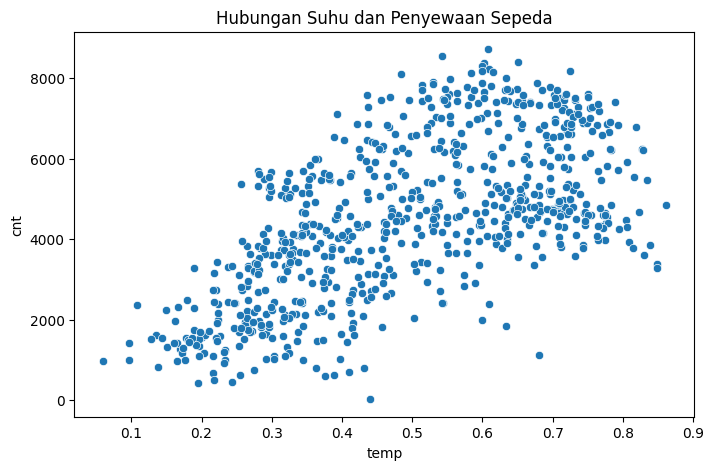

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df_clean)
plt.title("Hubungan Suhu dan Penyewaan Sepeda")
plt.show()

**Insight:**
- Penyewaan tertinggi terjadi di musim Fall dan terendah di musim Spring.
- Suhu memiliki hubungan positif dengan penyewaan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

Dari hasil analisis yang dilakukan, terdapat beberapa temuan pola penyewaan sepeda:

1. Variasi Penyewaan Berdasarkan Musim

Musim gugur menunjukkan tingkat penyewaan sepeda yang paling tinggi dibandingkan musim lainnya, sementara musim semi mencatat jumlah penyewaan terendah.
Salah satu kemungkinan penyebabnya adalah kondisi cuaca yang lebih stabil dan nyaman di musim gugur dibandingkan musim semi, yang sering kali lebih lembap dan hujan.

2. Dampak Cuaca terhadap Penyewaan

Saat kondisi cuaca cerah atau sedikit berawan (weathersit=1), jumlah pengguna meningkat signifikan.
Sebaliknya, ketika cuaca memburuk (weathersit=3 atau lebih, misalnya hujan deras atau salju), terjadi penurunan tajam dalam jumlah penyewaan.

3. Pengaruh Faktor Lingkungan

Temperatur yang terlalu rendah maupun terlalu tinggi berpotensi menurunkan minat masyarakat untuk menggunakan sepeda.
Kelembaban tinggi juga berkontribusi terhadap berkurangnya jumlah penyewa.

4. Perbedaan Pola Penggunaan di Hari Kerja dan Akhir Pekan

Pada hari kerja, jumlah penyewaan lebih stabil karena digunakan untuk keperluan transportasi harian.
Akhir pekan cenderung menunjukkan fluktuasi, dipengaruhi oleh faktor cuaca dan musim.

Rekomendasi:

1. Ketersediaan Sepedda

Menyediakan lebih banyak sepeda pada musim gugur serta pada akhir pekan dengan cuaca yang mendukung.
Melakukan pemeliharaan rutin selama musim semi karena penggunaan yang lebih rendah.

2. Penambahan Peningkatan Penggunaan

Menawarkan promosi atau diskon pada hari-hari dengan cuaca kurang ideal untuk mendorong pemakaian.
Mengintegrasikan fitur notifikasi cuaca dalam aplikasi penyewaan agar pengguna lebih siap menghadapi kondisi lingkungan.

3. Pengembangan Infrastruktur Pendukung

Menyediakan area berteduh di sekitar stasiun sepeda untuk mengantisipasi perubahan cuaca yang tiba-tiba.
Meningkatkan pencahayaan dan memastikan jalur sepeda tetap aman, terutama di musim dingin, guna meningkatkan kenyamanan dan keamanan pengguna.